# EDA


## Постановка задачи

Данные — это открытые сведения об [энергопотреблении зданий в Нью-Йорке](https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml).

Цель — предсказать рейтинг энергопотребления здания (Energy Star Score) и понять, какие признаки оказывают на него наибольшее влияние.

## Чистка данных


In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

In [229]:
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

### Cчитывание данных

Считаем данные и посмотрим на первые строки

In [230]:
data = pd.read_excel('energy_consumption.xlsx')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [231]:
print("Размеры датасета: ", data.shape)
print("Колонки датасета: ", data.columns)

Размеры датасета:  (11746, 60)
Колонки датасета:  Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weat

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

1. Необходимо понять, что из себя представляют признаки.
2. Описание целевой переменной: «Оценка в баллах от 1 до 100, основанная на предоставленных сведениях о потреблении электроэнергии. Рейтинг энергопотребления это относительная величина, используемая для сравнения эффективности использования энергии различными зданиями.»
3. Пропущенные данные, вставленные в набор, выглядят как строка с записью “Not Available”. Это означает, что Python, даже если эта колонка содержит в себе преимущественно числовые признаки, будет интерпретировать её как тип данных object, потому что Pandas интерпретирует любой признак, содержащий строковые значения, как строку.

### Корректировка типов

Многие признаки, являющиеся изначально числовыми (например, площади), интерпретированы как object. Анализировать их крайне сложно, так что сначала конвертируем их в числа, а именно в тип float.



Заменим значение “Not Available” в данных на np.nan. Это позволит изменить тип соответствующих числовых признаков на float:

In [233]:
data = data.replace({'Not Available': np.nan})

Теперь необходимо найти колонки, которые должны быть числовыми.

In [234]:
data.sample(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
11482,14524,3452981,"CubeSmart - Merrick Boulevard, Queens",Not Applicable: Standalone Property,Not Applicable: Standalone Property,4125160057,4-12516-0057,4270075,122-20 Merrick Boulevard,NaN,11434,122-22,MERRICK BOULEVARD,Queens,66000.0,Self-Storage Facility,Self-Storage Facility,Self-Storage Facility,67373,NaN,NaN,NaN,NaN,2000,1,100,Whole Building,Whole Building,NaN,7.8,9.2,0,0.1,9.5,NaN,NaN,NaN,NaN,NaN,NaN,352984.5,4279,0,0,34.6,18.7,15.8,67373,18.4,0.27,8,04/04/2017 08:55:34 AM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
10186,12789,3531294,Silverstein - 42-07 Elbertson St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,4015660001,4-01566-0001,4039151,42-07 Elbertson Street,NaN,11373,42-07,WHITNEY AVENUE,Queens,69000.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,89046,NaN,NaN,NaN,NaN,1956,1,100,Whole Building,NaN,77,69.1,73,3,0.6,98.3,NaN,0,NaN,NaN,NaN,NaN,5198670.3,55792.7,951007.6,270097.3,364.4,276.1,88.3,89046,NaN,NaN,94.8,05/01/2017 02:58:14 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
3657,4187,2664634,30 E 65 St. Corp.,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1013790051,1-01379-0051,1041091,30 East 65 St.,NaN,10065,30,EAST 65 STREET,Manhattan,147121.0,Multifamily Housing,"Multifamily Housing, Office, Retail Store",Multifamily Housing,147763,Office,6000,Retail Store,1000,1963,1,100,Whole Building,NaN,NaN,94.2,91.3,8.4,0,165,NaN,NaN,NaN,NaN,NaN,1.00113292E7,88522,901.3,4477525.8,1295153.2,1085,4.7,1080.2,154763,NaN,NaN,169.3,05/01/2017 04:04:27 PM,No,In Compliance,40.767228,-73.968423,8.0,4.0,122.0,Upper East Side-Carnegie Hill ...


Найдем, какие подстроки должны содержаться в названиях числовых столбцов

In [235]:
part_name_numeric_cols = ['ft²', 'kBtu', 'Metric Tons CO2e', 'kWh', 'therms', 'gal', 'Score']

Конвертируем выбранные числовые столбцы в тип float


In [236]:
for col in list(data.columns):
    if any([n_col in col for n_col in part_name_numeric_cols]):
        print(col)
        data[col] = data[col].astype(float)

Largest Property Use Type - Gross Floor Area (ft²)
2nd Largest Property Use - Gross Floor Area (ft²)
3rd Largest Property Use Type - Gross Floor Area (ft²)
ENERGY STAR Score
Site EUI (kBtu/ft²)
Weather Normalized Site EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Fuel Oil #1 Use (kBtu)
Fuel Oil #2 Use (kBtu)
Fuel Oil #4 Use (kBtu)
Fuel Oil #5 & 6 Use (kBtu)
Diesel #2 Use (kBtu)
District Steam Use (kBtu)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Electricity Use - Grid Purchase (kBtu)
Weather Normalized Site Electricity (kWh)
Total GHG Emissions (Metric Tons CO2e)
Direct GHG Emissions (Metric Tons CO2e)
Indirect GHG Emissions (Metric Tons CO2e)
Property GFA - Self-Reported (ft²)
Water Use (All Water Sources) (kgal)
Water Intensity (All Water Sources) (gal/ft²)
Source EUI (kBtu/ft²)


Проверим, что всё получилось:

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

Посчитаем, сколько после всех манипуляций у нас стало пропущенных значений:


In [238]:
data.isna().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            




Посмотрим на статистики по колонкам датасета

In [239]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

## Работа с пропусками


### Детектирование пропусков

Для начала давайте попробуем оценить масштаб проблемы для наших данных

In [240]:
def missing_values_table(df):

    # Общее число пропусков
    mis_val = df.isnull().sum()

    # Процент пропусков
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Создадит таблицу с результатом
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Переименнуем колонки
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Отсортируем по проценту пропущенных значений
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Выведем некоторую информацию
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    return mis_val_table_ren_columns

In [241]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


Признак нам вряд ли пригодится, если пропусков в нем слишком много. В данном случае удаляем признаки, в которых пропусков больше 50%.

In [242]:
# Получим отчет из функции missing_values_table
missing_df = missing_values_table(data)

# Выберем те колонки, для которых '% of Total Values' больше 50
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)

print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [243]:
data = data.drop(columns = list(missing_columns))

In [244]:
data.shape

(11746, 49)

In [245]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


### Заполнение пропусков


Заменим пропуски в числовых признаках средним по колонке

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [247]:
numeric_data = data.select_dtypes(include='number')
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

В категориальных признаках можно использовать -1 в качестве символа пропуска.

In [248]:
data = data.fillna(-1)

Проверим, что пропусков действительно не осталось:

In [249]:
data.isna().any().any()

False

## Univariate analysis


###  Анализ целевой переменной
Глобальная цель — это предсказание значения целевого признака, рейтинга энергопотребления. Так что в рамках Univariate analysis целесообразно для начала понять, какое целевая переменная имеет распределение.

Посмотрим на него, построив гистограмму с matplotlib.

Text(0.5, 1.0, 'Energy Star Score Distribution')

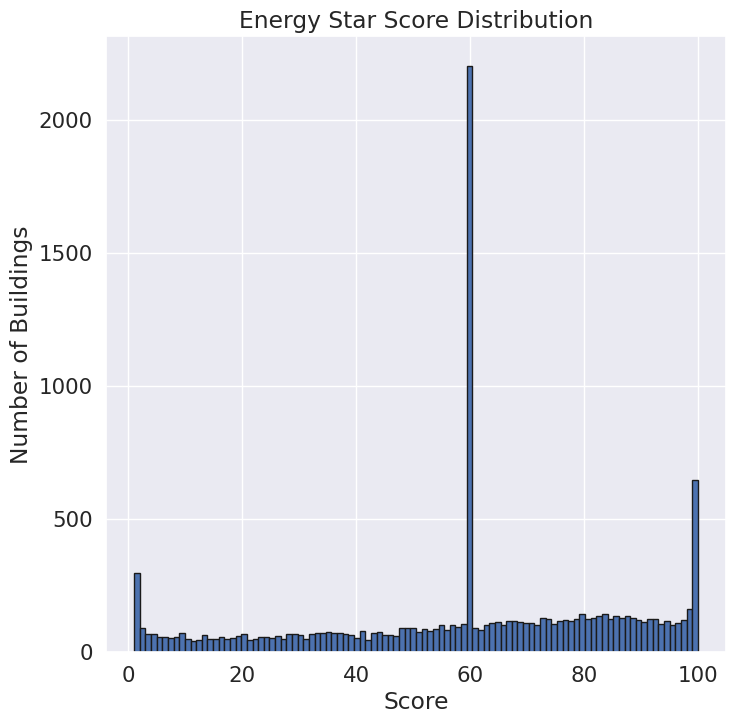

In [250]:
figsize(8, 8)

# Для удобства переименнуем столбец 'ENERGY STAR Score' в 'score'
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

plt.hist(data['score'], bins = 100, edgecolor = 'k')

plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

#### Вывод
Интересующий нас рейтинг представляет собой перцентиль, так что ожидаемо было бы увидеть равномерное распределение, где каждому значению соответствует примерно одинаковое количество зданий. Хотя в нашем случае на лицо диспропорция, больше всего зданий имеют максимальное значение рейтинга — 100, либо минимальное — 1 (высокий рейтинг это хороший показатель).

Обратимся к описанию признака и вспомним, что он основывается на “предоставляемых отчетах об энергопотреблении”. В результате мы получаем не самую объективную оценку эффективности использования электроэнергии в зданиях.



### Анализ нецелевых переменных


Построим гистограмму распределения поля Site EUI


Text(0.5, 1.0, 'Site EUI Distribution')

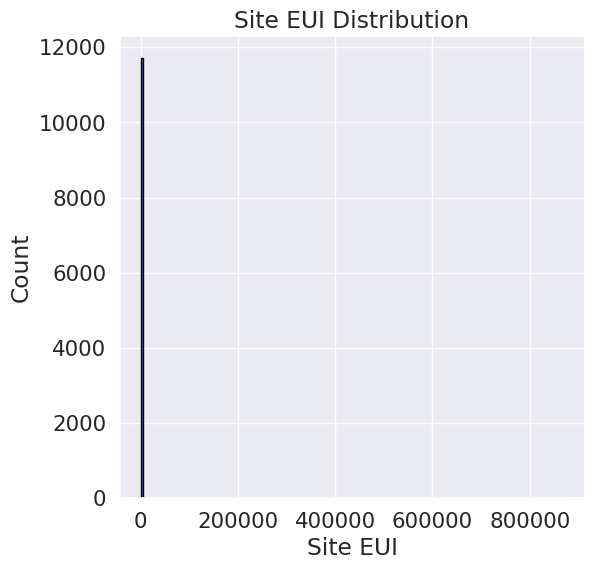

In [251]:
figsize(6, 6)

plt.hist(data['Site EUI (kBtu/ft²)'], bins = 200, edgecolor = 'black')

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

На этом графике явные выбросы.

In [252]:
data['Site EUI (kBtu/ft²)'].describe()

count     11746.000000
mean        280.071484
std        8547.243929
min           0.000000
25%          62.100000
50%          79.000000
75%          98.800000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

Между третьим квартилем и максимумом огромный разброс

Посмотрим на 10 самых больших значений в этой колонке:

In [253]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

Посмотрим сколько объектов со значением метрики больше 1000:

In [254]:
data[data['Site EUI (kBtu/ft²)'] > 1000].shape[0]

47

Повнимательнее посмотрим на эти выбросы:

In [255]:
data.loc[data['Site EUI (kBtu/ft²)'] > 1000, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
7,10,2610789,North Shore Towers,2610789,North Shore Towers,4084890001,4084890001,4456886;4456885;4453535;4456888,270-10 Grand Central Parkway,11005,269,GRAND CENTRAL PKWY,Queens,3750565.0,Multifamily Housing,"Financial Office, Medical Office, Multifamily ...",Multifamily Housing,2400000.0,1974,4,100,Whole Building,Combination of common and tenant areas,59.854594,143974.4,143976.000000,11.072643,1439.700000,151174.500000,3.942852e+11,3.942852e+09,5.965472e+06,1.768752e+06,20943400.0,20943400.0,0.0,2738875.0,107151.500000,39.130000,151172.9,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.000000,23.000000,155101.000000,Glen Oaks-Floral Park-New Hyde Park ...
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,11005,269,GRAND CENTRAL PKWY,Queens,3750565.0,Other,Other,Other,200.0,1974,1,100,Whole Building,-1,59.854594,1138.3,1091.500000,319.900000,1.901441,3427.300000,5.048545e+07,5.364578e+05,2.276581e+05,6.397990e+04,21.1,0.0,21.1,200.0,19261.100000,96305.690000,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.000000,23.000000,155101.000000,Glen Oaks-Floral Park-New Hyde Park ...
62,65,2658585,CEPSR Schapiro,3612678,Columbia University (morningside),1019730001,1019730001,1084476,530 West 120th Street,10027,530,WEST 120 STREET,Manhattan,1368870.0,Office,Office,Office,204069.0,1988,1,100,Whole Building,-1,1.000000,4377.4,4377.400000,179.300000,37.700000,5874.800000,7.684530e+08,7.684530e+06,1.248366e+08,3.658750e+07,52401.0,40816.2,11584.8,204069.0,15917.984063,136.172432,5874.8,04/24/2017 06:52:20 PM,No,In Compliance,40.809752,-73.960217,9.000000,7.000000,203.000000,Morningside Heights ...
123,126,2826188,Warren Weaver Hall,3616399,New York University: Washington Square,1005350036,1005350036,1008627,251 Mercer Street,10012,17,WEST 3 STREET,Manhattan,119170.0,College/University,College/University,College/University,158590.0,1966,1,100,Whole Building,-1,59.854594,9915.6,9958.600000,44.000000,94.300000,10755.300000,1.495878e+09,1.495878e+07,2.381303e+07,6.979200e+06,85582.7,83372.9,2209.8,158590.0,27410.900000,172.840000,10711.8,04/28/2017 07:15:52 PM,Yes,In Compliance,40.728347,-73.995898,2.000000,1.000000,5501.000000,West Village ...
541,585,2714770,zzzWassner 86 Trinity Place/ 113 Greenwich,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1000510013,1-00051-0013,1001033,86 Trinity Place,10006,86,TRINITY PLACE,Manhattan,181725.0,Office,Office,Office,167555.0,1921,1,100,Whole Building,Whole Building,1.000000,2025.2,309.747466,11.072643,1.901441,417.915709,5.048545e+07,5.364578e+05,9.881451e+05,1.768752e+06,2255

Воспользуемся boxplot-ом, чтобы убедиться, что эти объекты действительно похожи на выбросы

<Axes: ylabel='Site EUI (kBtu/ft²)'>

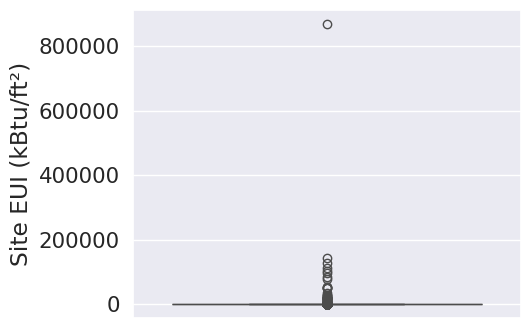

In [256]:
plt.figure(figsize=(5, 4))

sns.boxplot(data=data['Site EUI (kBtu/ft²)'])



### Работа с выбросами

Для того, чтобы качественно осуществлять Univariate analysis, нужно избавиться от выбросов после их выявления.

Удалим выбросы по следующей схеме:

- Ниже первой квартили - `3 iqr`
- Выше третьей квартили + `3 iqr`


In [257]:
# Рассчитаем первый и третий квартили поля Site EUI или возьмем значения из вывода метода describe
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Рассчитаем IQR как разницу между третьим и первым квартилями
iqr = third_quartile - first_quartile

Создадим условие на столбец Site EUI для отбора не выбросов


In [258]:
condition = (data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))
condition

0        False
1        False
2        False
3        False
4        False
         ...  
11741     True
11742     True
11743     True
11744     True
11745     True
Name: Site EUI (kBtu/ft²), Length: 11746, dtype: bool

Применим созданное условие к нашим данным, отфильтровав тем самым строки, не являющиеся выбросами


In [259]:
data = data[condition]

In [260]:
data.shape

(11325, 49)

In [261]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,-1,-1,-1,173269.45442,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.000000,32.0,309.747466,7.5,0.0,417.915709,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.000000,51.010000,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,-1,-1,-1,173269.45442,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,-1,59.854594,120.0,125.200000,8.7,0.9,193.600000,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,15917.984063,136.172432,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,-1,-1,-1,173269.45442,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.000000,76.2,79.900000,3.5,0.0,106.200000,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.600000,18.400000,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,-1,67.000000,75.7,79.000000,4.0,0.0,109.100000,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,15917.984063,136.172432,106.6,05/01/2017 10:09:31 PM,-1,In Compliance,40.857943,-73.934962,12.000000,10.000000,281.000000,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,-1,80.000000,77.1,82.700000,2.6,0.0,102.800000,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,15917.984063,136.172432,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.000000,10.000000,281.00000

Построим еще раз гистограмму распределения поля Site EUI.


Text(0.5, 1.0, 'Site EUI Distribution')

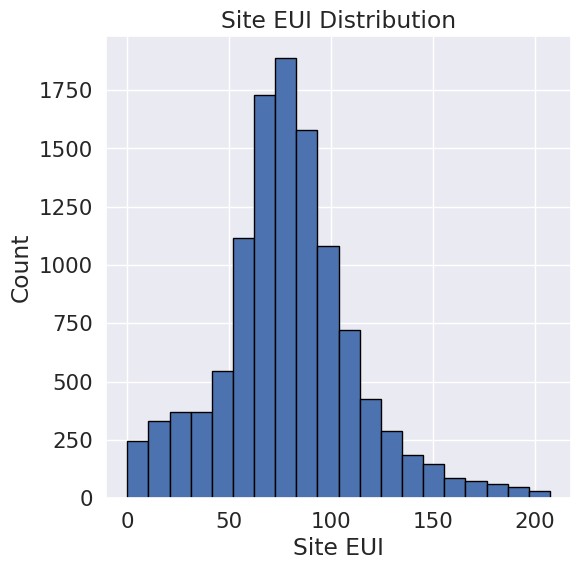

In [262]:
figsize(6, 6)

plt.hist(data['Site EUI (kBtu/ft²)'], bins = 20, edgecolor = 'black')

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Очень похоже на нормальное распределение

Воспользуемся теперь еще раз boxplot

<Axes: >

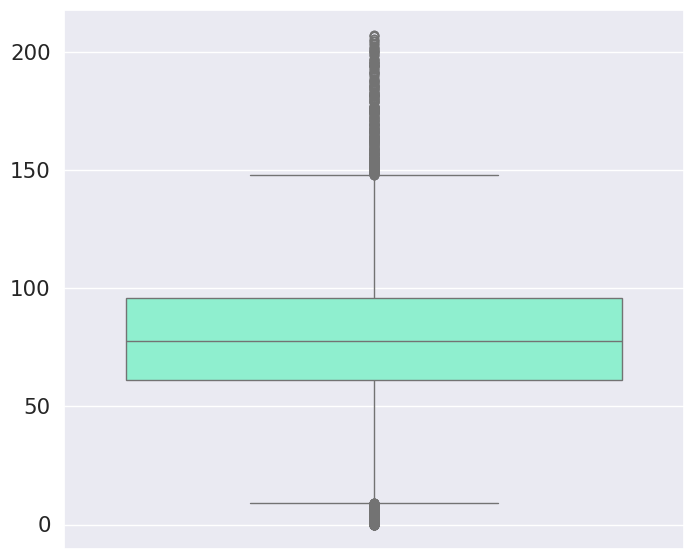

In [263]:
plt.figure(figsize=(8, 7))

sns.boxplot(data=data['Site EUI (kBtu/ft²)'].values, color = 'aquamarine')

### Влияние категориальной переменной на целевую

Оценить влияние значений категориальных признаков на целевой признак можно построением графика density plot. Мы получаем распределение целевого признака для одной конкретной категории.

Код ниже строит density plot для рейтинга энергопотребления в зависимости от типа здания. Разными цветами показаны рейтинги для различных типов (рассматриваются типы зданий с как минимум сотней записей):

In [264]:
# Создадим список types с названиями категорий зданий с более, чем 100 измерениями
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types.remove('Other')

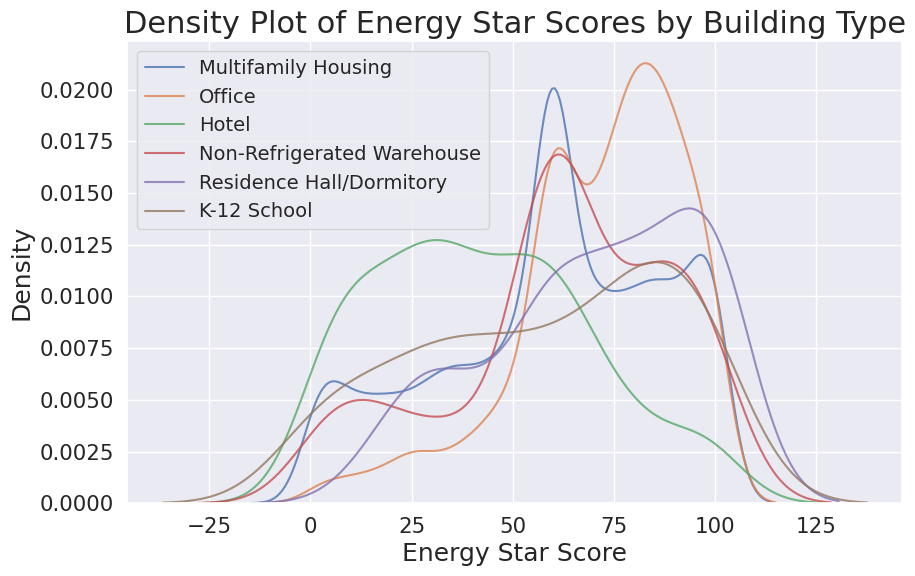

In [265]:
figsize(10, 6)

# Построим на одном графике распределения оценок для каждого типа зданий из списка types
for b_type in types:
    # Выберем данные одного из типов зданий из списка types
    subset = data[data['Largest Property Use Type'] == b_type]

    # Воспользуемся функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = b_type, fill = False, alpha = 0.8)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 22)
plt.legend(fontsize=14)

Видно, что тип здания оказывает существенное влияние на рейтинг энергопотребления. Здания, используемые как офисы, чаще имеют хороший рейтинг, а отели наоборот. Получается, такой признак, как тип здания, для нас важен. Так как это признак категориальный, нам ещё предстоит выполнить «one-hot encoding».



Давайте теперь повторим аналогичные действия для различных районов:

In [266]:
# Создадим список boroughs с названиями районов с более, чем 100 измерениями
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

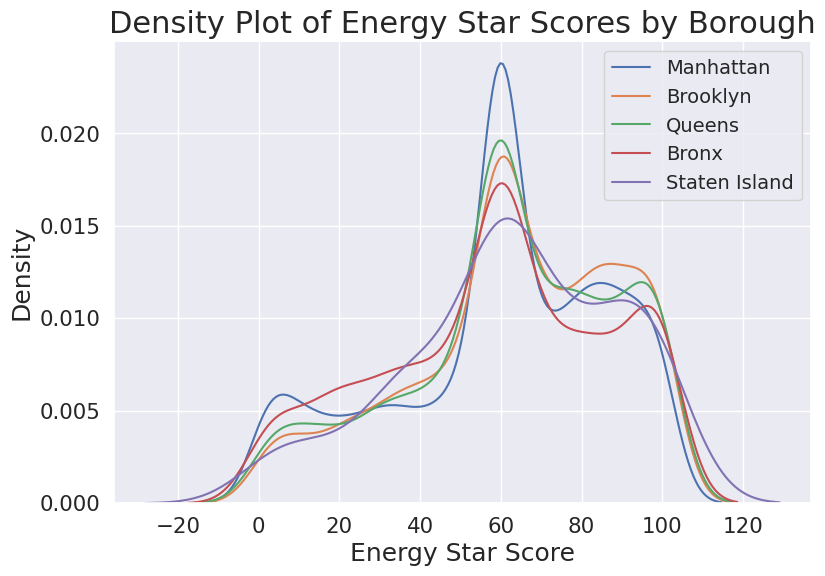

In [267]:
figsize(9, 6)

# Постройте на одном графике распределения оценок для каждого района из списка boroughs
for borough in boroughs:
    # Выберете данные одного из районов из списка boroughs
    subset = data[data['Borough'] == borough]

    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = borough)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Borough', size = 22)
plt.legend(fontsize=14)

Район оказывает уже не такое большое влияние. Тем не менее, стоит включить этот признак в модель, так как определенная разница между районами все же есть.

### Корреляции между признаками и целевой переменной


In [268]:
numeric_data = data.select_dtypes(include='number')
correlations_data = data[numeric_data.columns].corr()['score'].sort_values()
print(correlations_data)

Site EUI (kBtu/ft²)                                          -0.632581
Source EUI (kBtu/ft²)                                        -0.551438
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.290951
Weather Normalized Source EUI (kBtu/ft²)                     -0.246809
Weather Normalized Site EUI (kBtu/ft²)                       -0.190641
Direct GHG Emissions (Metric Tons CO2e)                      -0.127582
Year Built                                                   -0.109041
Total GHG Emissions (Metric Tons CO2e)                       -0.096249
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.079944
Electricity Use - Grid Purchase (kBtu)                       -0.043684
Property Id                                                  -0.042415
Latitude                                                     -0.041216
Weather Normalized Site Electricity (kWh)                    -0.039895
Indirect GHG Emissions (Metric Tons CO2e)                    -0.038493
Natura

В данных есть несколько признаков, имеющих высокие отрицательные значения коэффициента корреляции.

Самая большая (по модулю) корреляция достигается для разных категорий EUI (они между собой слегка отличаются по способу расчета). EUI  —  Energy Use Intensity  —  это количество использованной энергии, разделенное на площадь помещений в квадратных футах. Значит, чем этот признак ниже, тем лучше. Соответственно: с ростом EUI, рейтинг энергопотребления, становится ниже.


Воспользуемся функцией heatmap для отрисовки матрицы корреляции (тепловой карты)

<Axes: >

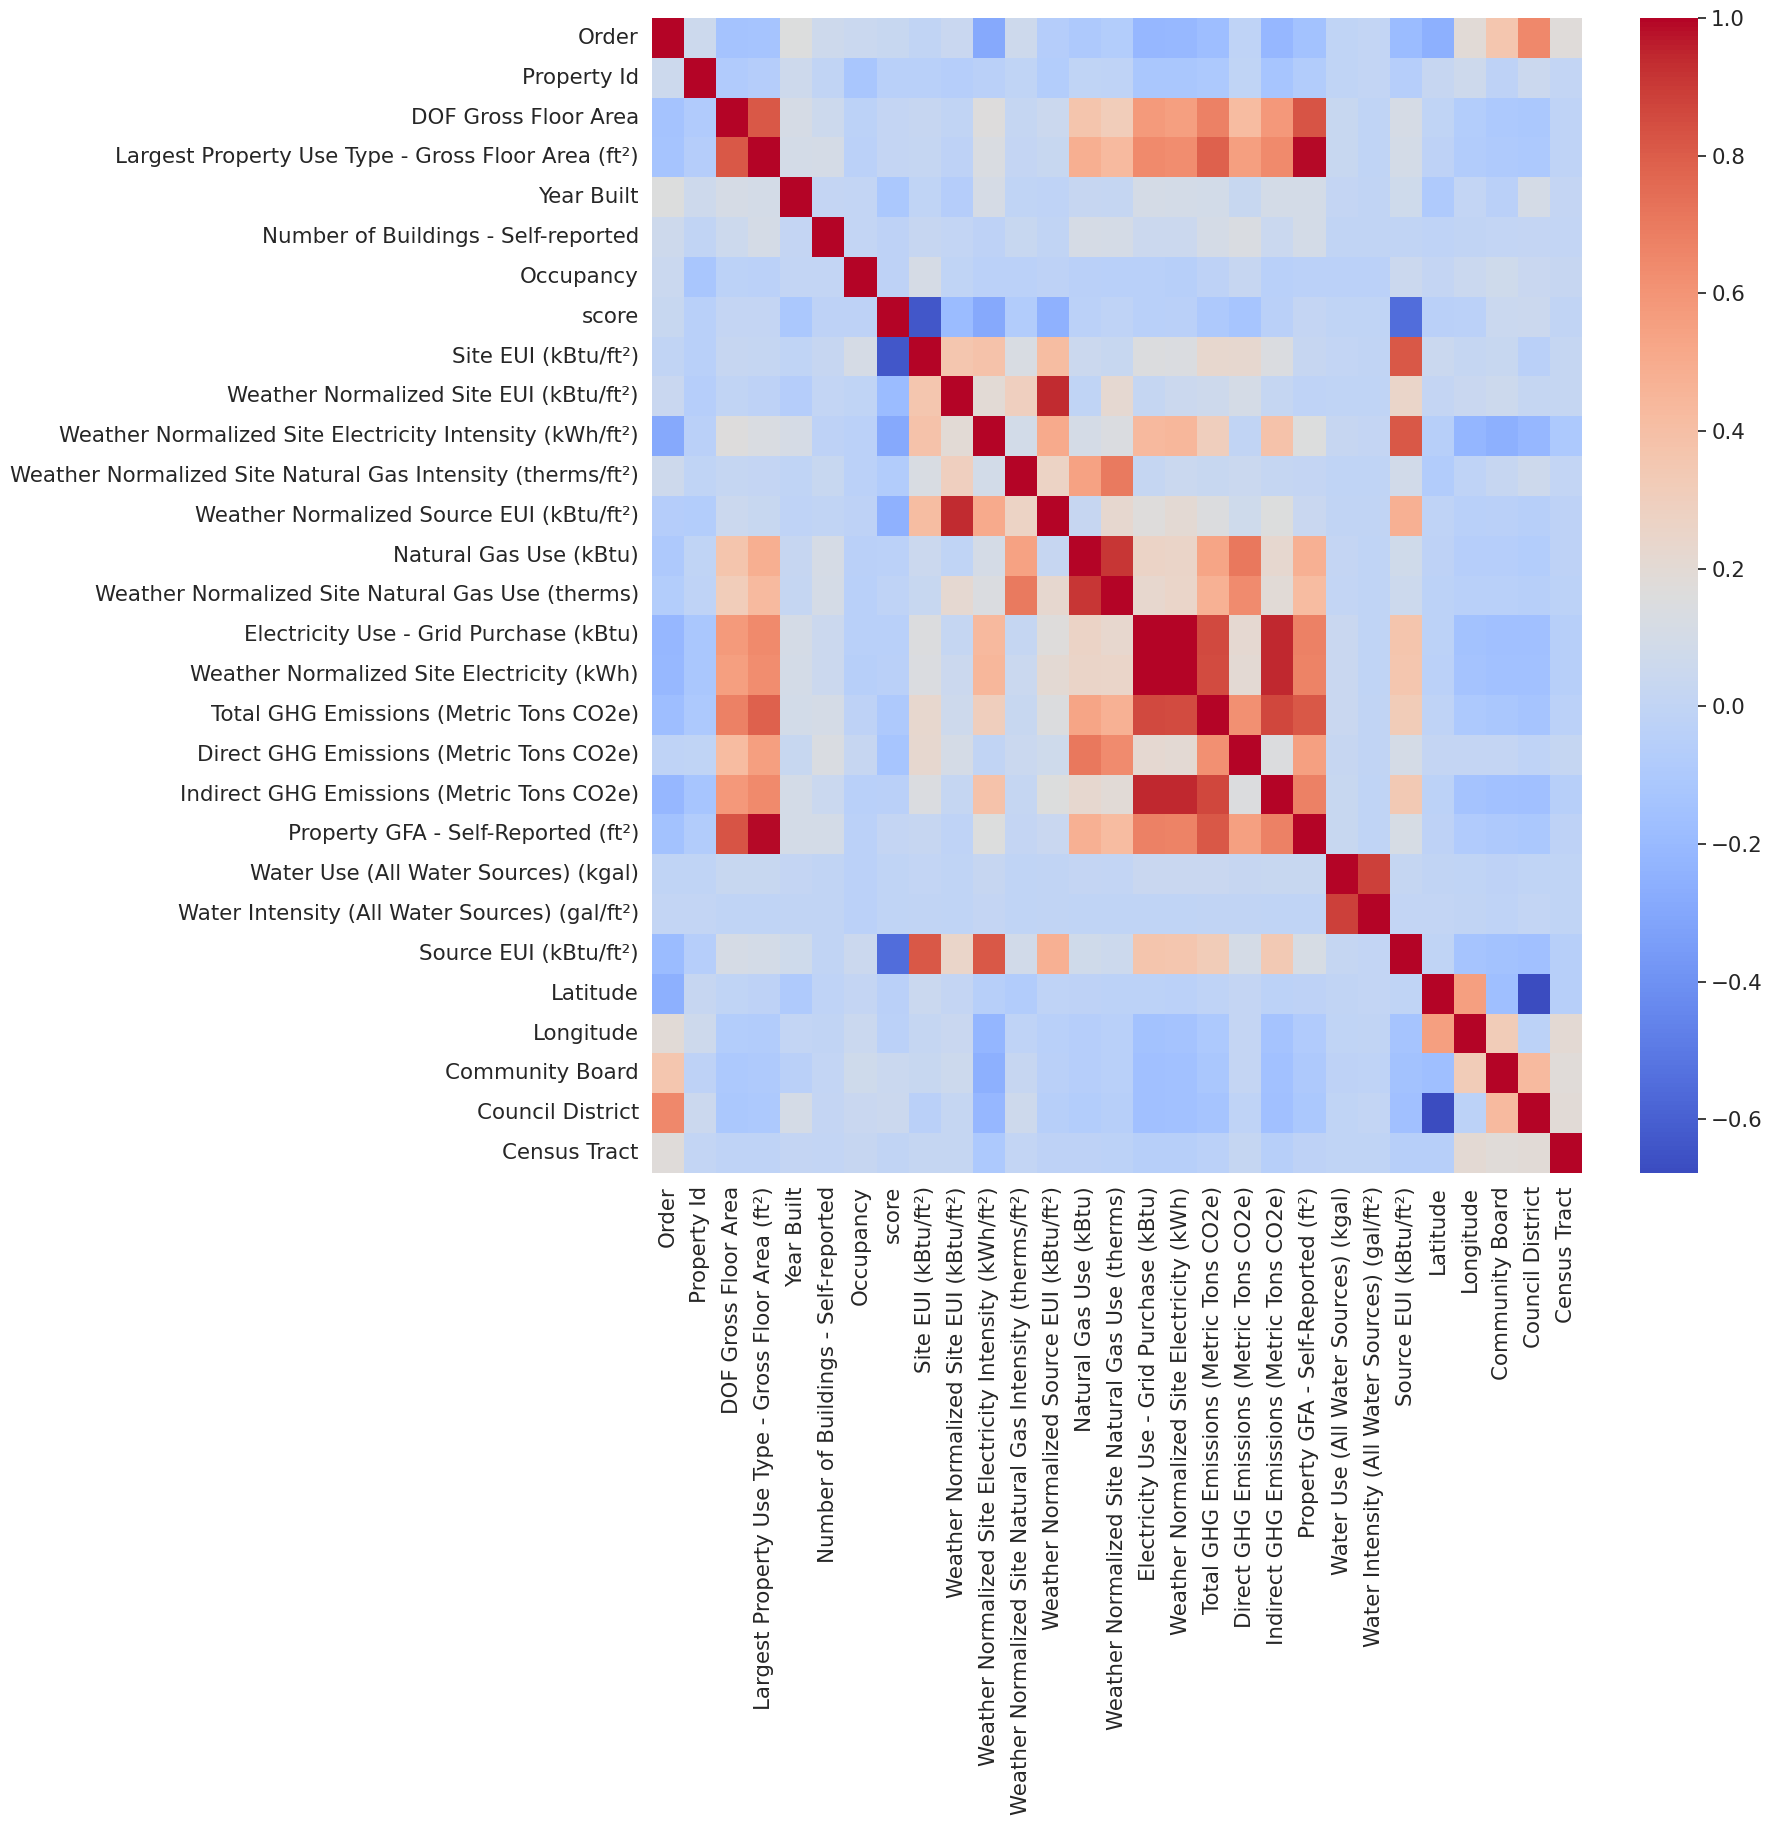

In [269]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(data[numeric_data.columns].corr(), cbar=True, cmap='coolwarm')

### Bivariate analysis

Для анализа взаимосвязи двух непрерывных переменных можно использовать диаграмму рассеяния или точечные графики. Дополнительную информацию, такую как значения категориальных признаков, можно показывать различными цветами.

График снизу демонстрирует разброс рейтинга энергопотребления в зависимости от величины Site EUI, а разными цветами показаны типы зданий (взятые из предыдущих пунктов):

In [270]:
# Сделаем копию нашего датасета для того, чтобы ничего не испортить
features = data.copy()

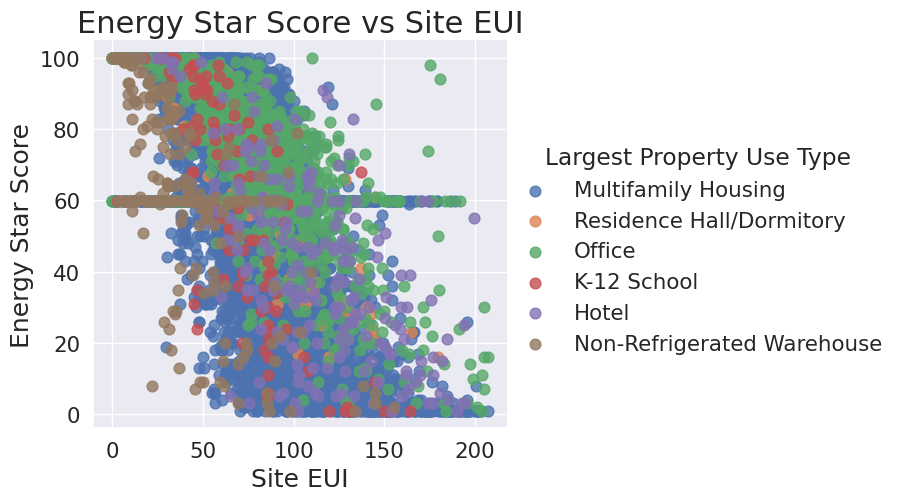

In [271]:
figsize(8, 6)

# Выберем только те строки, которые соответствуют типам зданий, содержащим более 100 записей
features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot(x = 'Site EUI (kBtu/ft²)', y = 'score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False, aspect = 1.2)

plt.xlabel('Site EUI', size = 18)
plt.ylabel('Energy Star Score', size = 18)
plt.title('Energy Star Score vs Site EUI', size = 22);

Данный график наглядно демонстрирует, что такое коэффициент корреляции со значением -0.7: Site EUI уменьшается и рейтинг энергопотребления уверенно возрастает, независимо от типа здания.

### Pairs plot

Построим Pairs Plot, чтобы взглянуть на взаимосвязи сразу между несколькими признаками, а также на их совместные парные распределения.

Построен Pairs Plot был со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.

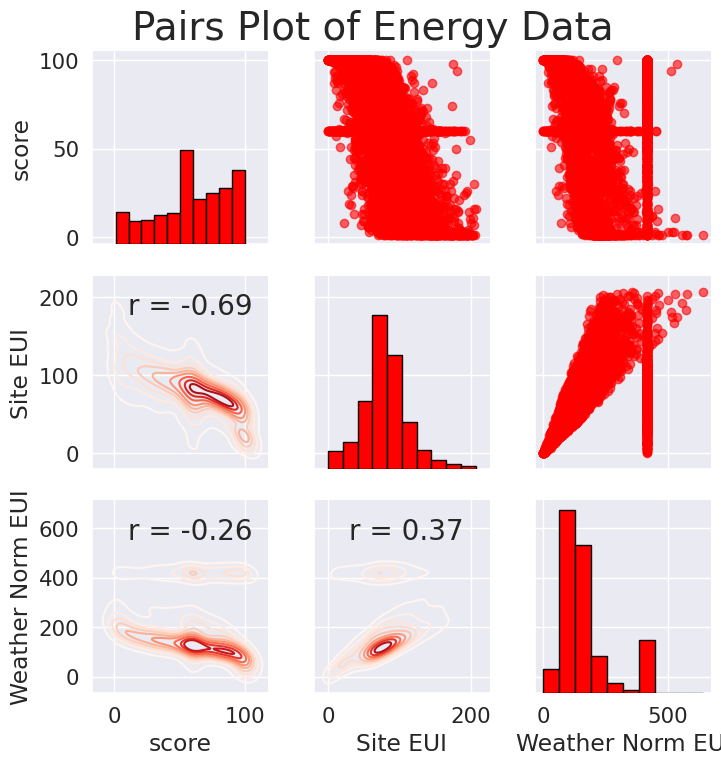

In [272]:
# Выберем колонки, на которые мы будем смотреть в попарном разрезе
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)']]

# Заменим бесконечности на np.nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Для удобства переименнуем колонки
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Удалим пропущенные значения
plot_data = plot_data.dropna()

# Воспользуемся следующей функцией для подсчета корреляции между двумя векторами
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Создадим объект PairGrid и настроим в нем отображение графиков
grid = sns.PairGrid(data = plot_data)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 28, y = 1.02);

График помогает понять, какие признаки стоит включить в нашу модель.

# ML

## Изменение датасета

Вспомним состав датасета

In [273]:
data.shape

(11325, 49)

In [274]:
data.tail(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,11215,-1,-1,-1,173269.45442,Multifamily Housing,Multifamily Housing,Multifamily Housing,103328.0,1913,1,95,Whole Building,-1,83.0,44.3,43.9,7.7,0.2,101.0,1761629.8,18131.0,2818854.7,796837.2,355.2,93.6,261.6,103328.0,15917.984063,136.172432,103.6,03/23/2017 02:51:02 PM,-1,-1,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,11215,27,PROSPECT PARK WEST,Brooklyn,57824.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,60715.0,1928,1,100,Whole Building,Whole Building,92.0,70.0,74.9,2.6,0.7,96.9,3693499.8,40162.6,556759.9,155319.3,247.8,196.2,51.7,60715.0,1687.600000,27.800000,92.7,04/26/2017 11:20:06 AM,-1,-1,40.670728,-73.971752,6.000000,39.000000,165.000000,Park Slope-Gowanus ...
11745,14993,4952165,Tryad: 420 Clinton Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3019600022,3-01960-0022\t,3055969,420 Clinton Ave\t,11238,419,VANDERBILT AVENUE,Brooklyn,60720.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,63756.0,1930,1,100,Whole Building,-1,19.0,130.2,140.5,3.4,1.3,172.0,7528499.8,82151.4,770105.4,218287.2,471.3,399.9,71.5,63756.0,15917.984063,136.172432,161.9,04/27/2017 06:37:53 AM,Yes,-1,40.685549,-73.968310,2.000000,35.000000,199.000000,Clinton Hill ...


Создадим копию датасета, в которой станутся численный признаки, у которых абсолютное значение корреляции с целевой переменной больше 0,1, и тип здания (тип здания остается, потому что анализ выявил корреляцию между ним и целевой переменной. это признак категориального типа, а значит придется воспользоваться «one-hot encoding»)

In [275]:
numeric_data = data.select_dtypes(include='number')
df = data[numeric_data.columns]
correlations = df.corr()['score'].abs()
selected_columns = correlations[correlations >= 0.1].index
df = df[selected_columns]
df = pd.concat([df, data["Largest Property Use Type"]], axis=1)
df.tail()

,Year Built,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Source EUI (kBtu/ft²),Direct GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Largest Property Use Type
11741,1928,98.0,81.4,87.0,3.3,114.9,275.1,109.6,Multifamily Housing
11742,1926,16.0,109.3,117.7,5.3,160.8,499.7,153.4,Multifamily Housing
11743,1913,83.0,44.3,43.9,7.7,101.0,93.6,103.6,Multifamily Housing
11744,1928,92.0,70.0,74.9,2.6,96.9,196.2,92.7,Multifamily Housing
11745,1930,19.0,130.2,140.5,3.4,172.0,399.9,161.9,Multifamily Housing


Закодируем Largest Property Use Type с помощью «one-hot encoding»


In [276]:
# Заменяем значения в столбце "Largest Property Use Type" на "Other", если их количество меньше 100
types_to_merge = df['Largest Property Use Type'].value_counts()
types_to_merge = types_to_merge[types_to_merge < 100].index
df.loc[df['Largest Property Use Type'].isin(types_to_merge), 'Largest Property Use Type'] = 'Other'

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=['Largest Property Use Type'])
df.tail()

,Year Built,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Source EUI (kBtu/ft²),Direct GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Residence Hall/Dormitory
11741,1928,98.0,81.4,87.0,3.3,114.9,275.1,109.6,False,False,True,False,False,False,False
11742,1926,16.0,109.3,117.7,5.3,160.8,499.7,153.4,False,False,True,False,False,False,False
11743,1913,83.0,44.3,43.9,7.7,101.0,93.6,103.6,False,False,True,False,False,False,False
11744,1928,92.0,70.0,74.9,2.6,96.9,196.2,92.7,False,False,True,False,False,False,False
11745,1930,19.0,130.2,140.5,3.4,172.0,399.9,161.9,False,False,True,False,False,False,False


Посмотрим еще раз корреляции

In [277]:
correlations_data = df.corr()['score'].sort_values()
print(correlations_data)

Site EUI (kBtu/ft²)                                       -0.632581
Source EUI (kBtu/ft²)                                     -0.551438
Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.290951
Weather Normalized Source EUI (kBtu/ft²)                  -0.246809
Weather Normalized Site EUI (kBtu/ft²)                    -0.190641
Direct GHG Emissions (Metric Tons CO2e)                   -0.127582
Year Built                                                -0.109041
Largest Property Use Type_Hotel                           -0.093573
Largest Property Use Type_Multifamily Housing             -0.083920
Largest Property Use Type_K-12 School                     -0.009693
Largest Property Use Type_Other                           -0.007157
Largest Property Use Type_Non-Refrigerated Warehouse       0.006102
Largest Property Use Type_Residence Hall/Dormitory         0.034490
Largest Property Use Type_Office                           0.149889
score                                           

Разделим данные на признаки и таргет

In [278]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_y = df['score']
df_X = df.drop(columns=['score'])
df_X.tail()

,Year Built,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Source EUI (kBtu/ft²),Direct GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Residence Hall/Dormitory
11741,1928,81.4,87.0,3.3,114.9,275.1,109.6,False,False,True,False,False,False,False
11742,1926,109.3,117.7,5.3,160.8,499.7,153.4,False,False,True,False,False,False,False
11743,1913,44.3,43.9,7.7,101.0,93.6,103.6,False,False,True,False,False,False,False
11744,1928,70.0,74.9,2.6,96.9,196.2,92.7,False,False,True,False,False,False,False
11745,1930,130.2,140.5,3.4,172.0,399.9,161.9,False,False,True,False,False,False,False


## Линейная регрессия

Сначала для одной переменной. Выберем Site EUI (kBtu/ft²), так как у этого признака корреляция с целевой переменной наибольшая.

Coefficients: 
 [-0.51204447]
Mean squared error: 433.11
Coefficient of determination: 0.40


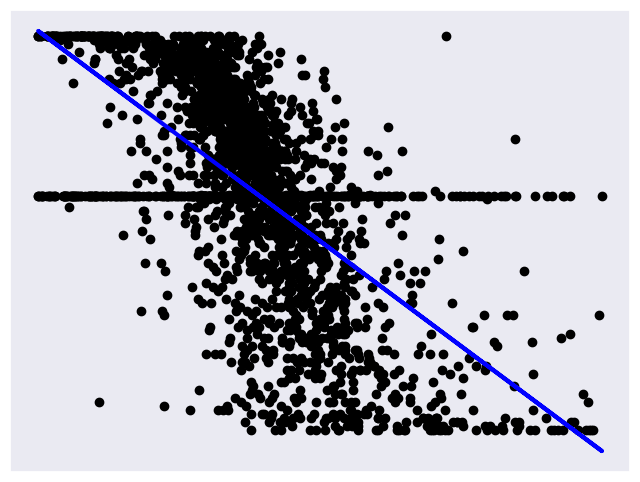

In [279]:
df_X = df_X['Site EUI (kBtu/ft²)']

# Разделение на обучающий и тестовый наборы
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
df_X_train = df_X_train.values.reshape(-1, 1)
df_X_test = df_X_test.values.reshape(-1, 1)
# Создание объекта линейной регрессии
regr = linear_model.LinearRegression()

# Обучение модели на обучающем наборе данных
regr.fit(df_X_train, df_y_train)

# Прогнозирование с использованием тестового набора данных
df_y_pred = regr.predict(df_X_test)

# Коэффициенты
print("Coefficients: \n", regr.coef_)
# Среднеквадратическая ошибка
print("Mean squared error: %.2f" % mean_squared_error(df_y_test, df_y_pred))
# Коэффициент детерминации: 1 - идеальное предсказание
print("Coefficient of determination: %.2f" % r2_score(df_y_test, df_y_pred))

# Визуализация результатов
plt.scatter(df_X_test, df_y_test, color="black")
plt.plot(df_X_test, df_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Для одной переменной 0.4 хороший результат, а MSE можно использовать для сравнения моделей

Теперь для всех переменных

In [280]:
df_y = df['score']
df_X = df.drop(columns=['score'])
df_X.tail()
# Разделение на обучающий и тестовый наборы
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
# df_X_train = df_X_train.values.reshape(-1, 1)
# df_X_test = df_X_test.values.reshape(-1, 1)
# Создание объекта линейной регрессии
regr = linear_model.LinearRegression()

# Обучение модели на обучающем наборе данных
regr.fit(df_X_train, df_y_train)

# Прогнозирование с использованием тестового набора данных
df_y_pred = regr.predict(df_X_test)

# Коэффициенты
print("Coefficients: \n", regr.coef_)
# Среднеквадратическая ошибка
print("Mean squared error: %.2f" % mean_squared_error(df_y_test, df_y_pred))
# Коэффициент детерминации: 1 - идеальное предсказание
print("Coefficient of determination: %.2f" % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [-5.48735278e-02 -3.68431371e-01  2.33537573e-02  7.16603363e-02
 -9.32067594e-03  1.51278670e-04 -1.09118310e-01  3.21654410e+00
 -5.17903210e+00 -1.56120212e+00 -1.80471337e+01  1.62888078e+01
  1.11632442e+00  4.16569158e+00]
Mean squared error: 386.37
Coefficient of determination: 0.46


0,46 хороший результат для модели, MSE для одной переменной 433, для нескольких - 386